<a href="https://colab.research.google.com/github/gh-ita/StudentProductivity/blob/main/ProblemSolving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
import numpy as np

In [16]:
dataset_path = '/content/student_data.csv'
student_df = pd.read_csv(dataset_path)

In [ ]:
print(student_df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [8]:
student_df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Cette table contient 33 colonnes

In [9]:
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numerical_features)
print(len(numerical_features))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
16


On a 16 variables numériques et 14 variables catégoriques

In [10]:
print(student_df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [14]:
print("Le nombre de valeurs manquantes est : ")
print(student_df.isnull().sum().sum())

Le nombre de valeurs manquantes est : 
0


On n'a pas de valeurs manquantes

In [17]:
student_df = student_df.drop(['guardian','schoolsup' , 'paid' , 'nursery' ,'higher' ,'romantic' ,'Dalc' ,'Walc','G1','G2'],1)

<ipython-input-17-607c0ad87f7b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  student_df = student_df.drop(['guardian','schoolsup' , 'paid' , 'nursery' ,'higher' ,'romantic' ,'Dalc' ,'Walc','G1','G2'],1)


In [18]:
print("La table contient maintenant ",len(student_df.columns.tolist()), " colonnes")
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = student_df.select_dtypes(include='object').columns.tolist()
print(numerical_features)
print("On a ",len(numerical_features)," variables numériques")
print(categorical_features)
print("On a ",len(categorical_features)," variables catégoriques")

La table contient maintenant  23  colonnes
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G3']
On a  12  variables numériques
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'famsup', 'activities', 'internet']
On a  11  variables catégoriques


On a enlevé 8 variables qui n'ont pas de relation avec le contexte de notre étude. La table contient maintenant 12 variables numériques et 11 variables catégoriques.

# Transformation des variables catégoriques en des variables numériques

In [28]:
encoder = OneHotEncoder()

numerical_features_df = student_df.select_dtypes(include=['float64', 'int64'])
categorical_features_df = student_df.select_dtypes(include='object')

#application du onehotencoder afin de transformer les variables categoriques en des variables numériques
categorical_tonumerical_features = encoder.fit_transform(categorical_features_df).toarray()
encoded_columns = encoder.get_feature_names_out(categorical_features_df.columns)

# Create a DataFrame from the transformed categorical features with proper column names
categorical_tonumerical_df = pd.DataFrame(categorical_tonumerical_features, columns=encoded_columns)

# Concatenate numerical and transformed categorical features
student_df_encoded = pd.concat([numerical_features_df, categorical_tonumerical_df], axis=1)
student_df_encoded.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,reason_course,reason_home,reason_other,reason_reputation,famsup_no,famsup_yes,activities_no,activities_yes,internet_no,internet_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,...,0.367089,0.275949,0.091139,0.265823,0.387342,0.612658,0.491139,0.508861,0.167089,0.832911
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,...,0.482622,0.447558,0.288172,0.442331,0.487761,0.487761,0.500555,0.500555,0.373528,0.373528
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


La nouvelle table contient 42 variables numériques

In [32]:
standarisation = StandardScaler()

student_data_standarise = pd.DataFrame(standarisation.fit_transform(student_df_encoded), columns=student_df_encoded.columns)


On a standarisé les données.

# Clustering hiérarchique

---






On va appliquer le clustering sur les variables en prenant comme critére de distance la corrélation entre les variables.

## Méthode average et métrique correlation

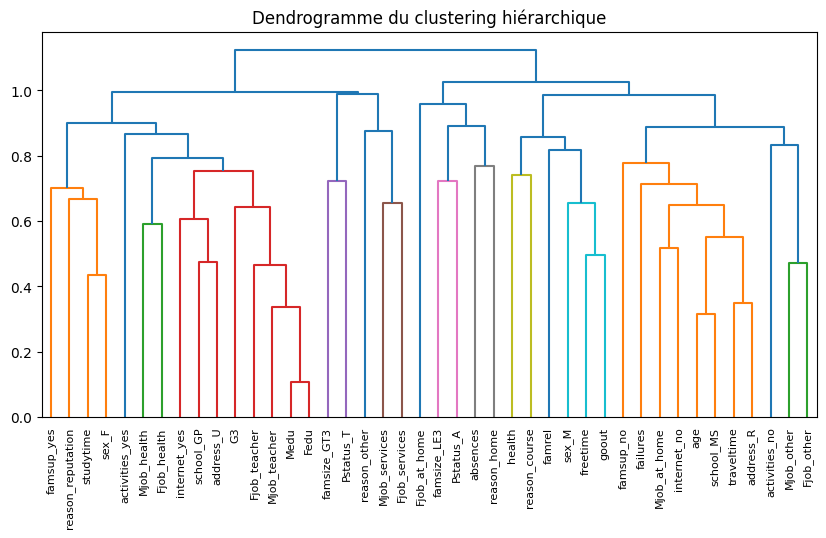

In [54]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [55]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.49296289321365144


## Méthode single et métrique correlation





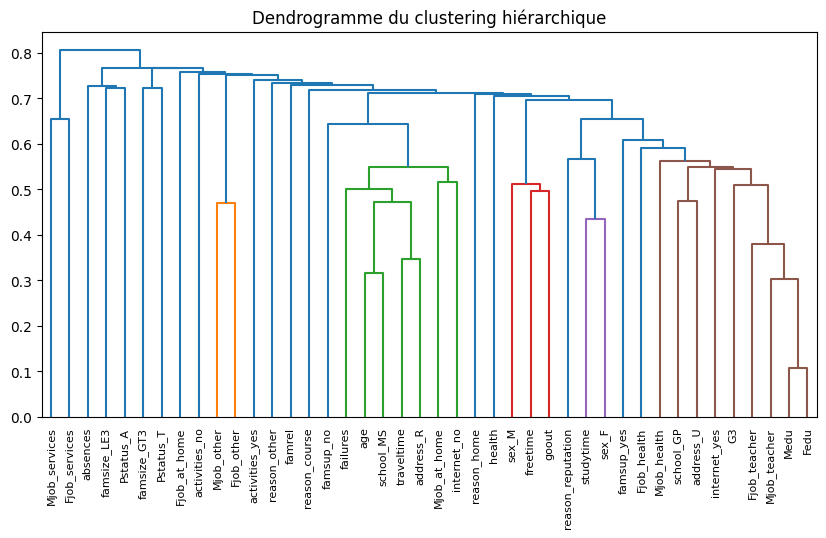

In [39]:
S = hierarchy.linkage(correlation_matrix, method='single', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(S, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [40]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(S, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.32590449674672367


## Méthode complete et métrique correlation

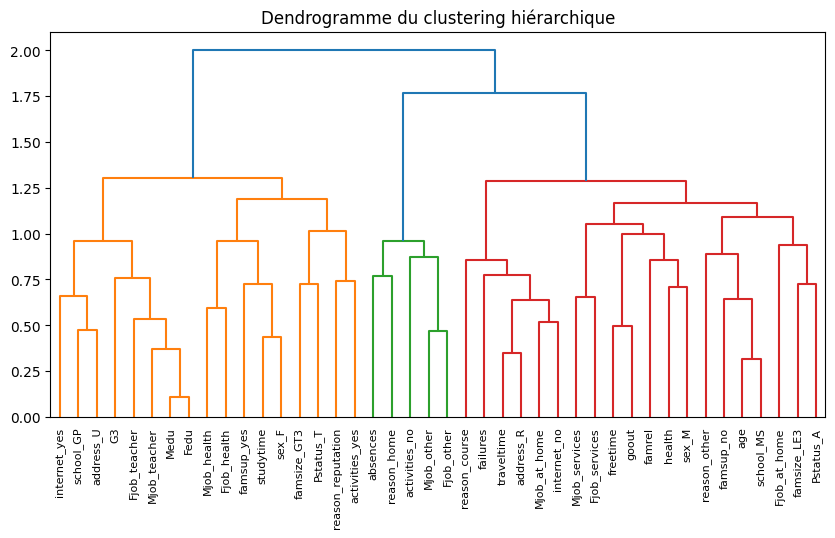

In [42]:
C = hierarchy.linkage(correlation_matrix, method='complete', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(C, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [43]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(C, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.45946780426783035


## Méthode ward et métrique euclidienne

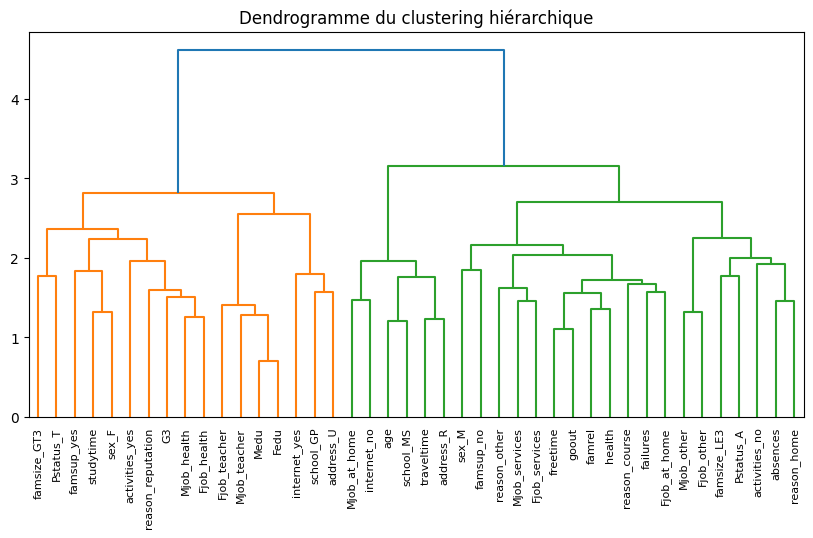

In [46]:
W = hierarchy.linkage(correlation_matrix, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(W, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [47]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(W, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.47353450383544804


## Méthode average et métrique euclidiénne

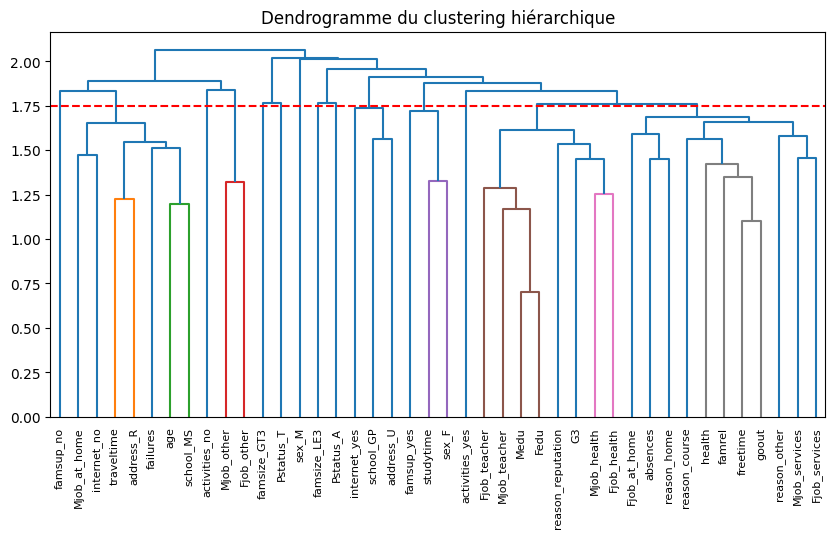

In [56]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='euclidean')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.axhline(y= 1.75, color='r', linestyle='--')
plt.show()

In [51]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.6157568645711968


## Méthode average et métrique cosine

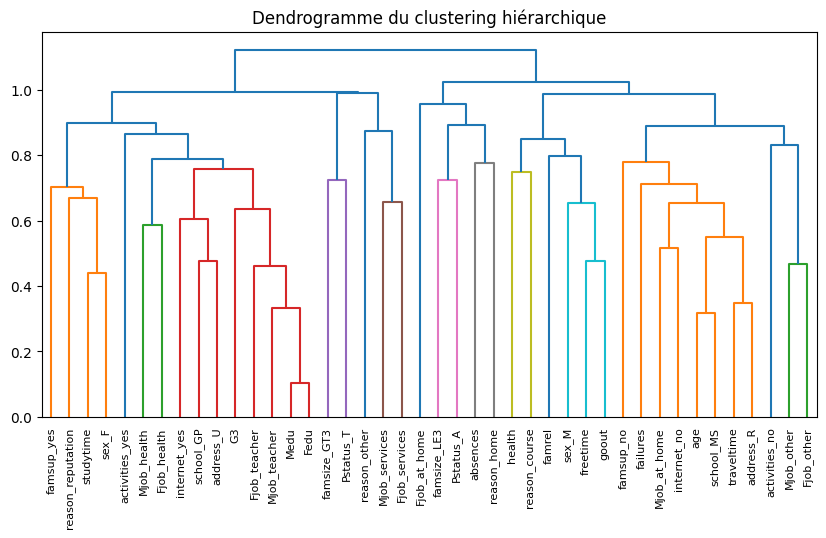

In [52]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='cosine')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [53]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.4944197880346395


**Inteprétation des résultats :**

*   En utilisant la méthode average et la métrique euclidienne on a eu un coefficient cophénétique de 0.61, qui est la plus grande valeur de ce coefficient parmis toutes les combinaisons.
*   Cette valeur de ce coefficient montre que le clustering résultant de cette combinaison refléte bien la distance réelle entre les variables.
*   Le but de ce clustering est de trouver les variables qui sont les plus corrélées à la variable G3 qui représente la note des étudiants, ceci dit le résultat du clustering montre que :

  *   Le travail de la mére (Mjob)
  *   Le travail du pére (Fjob)
  *   L'éducation de la mére (Medu)
  *   L'éducation du pére (Fedu)
  *   La raison du choix de l'université (reason)
  *   L'absence (absences)
  *   La santé (health)
  *   La qualité de la relation avec la famille (famrel)
  *   Le temps libre (freetime)
  *   S'amuser (goout)

Ces variables sont celles qui affectent la note des étudiants.








